> 1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение

Удалим все дни, в которых есть пропуск. В такие дни либо биржа могла не работать,
например выходной или авария, или данные просто повреждены

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

googleSet = pd.read_csv('data/GoogleHistory.csv')
googleSet = googleSet.dropna(how='any')
googleSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


> 2. Постройте как минимум по 1 графику каждого типа из представленных на лекции.
Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика

В 02-lecture.ipynb я нашел следующие графики: plot, hist, hist2d, scatter, boxplot.

Мне кажется ничего кроме plot и scatter для графиков акций не представляем никакого интереса:
1. plot - показать сам график роста стоимости акций для open/close
2. scatter - на графике с plot показать high/low

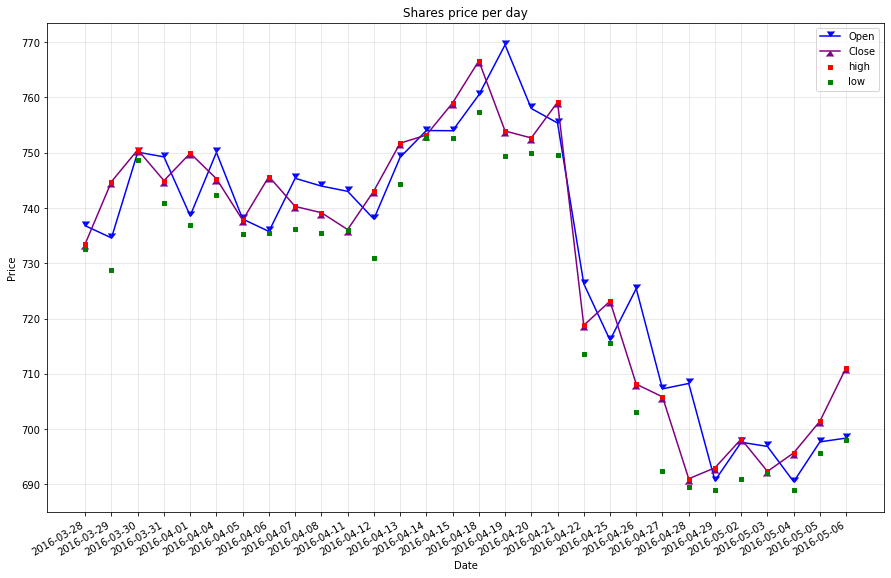

In [221]:
def show_slice(amount):
    fg, ax = plt.subplots()
    dates = googleSet.Date.head(amount)
    open_price = googleSet.Open.head(amount)
    close_price = googleSet.Close.head(amount)
    high_price = googleSet.Close.head(amount)
    low_price = googleSet.Low.head(amount)
    point_size = max(1, 600 / amount)
    marker_size = max(1, 210 / amount)
    fg.set_figwidth(15)
    fg.set_figheight(10)
    ax.set_ylabel('Price')
    ax.set_xlabel('Date')
    ax.set_title('Shares price per day')
    ax.plot(dates, open_price, zorder=1, c='blue', marker=7, markersize=marker_size, label='Open')
    ax.plot(dates, close_price, zorder=2, c='purple', marker=6, markersize=marker_size, label='Close')
    ax.scatter(dates, high_price, zorder=3, c='red', marker='s', s=point_size, label='high')
    ax.scatter(dates, low_price, zorder=4, c='green', marker='s', s=point_size, label='low')
    ax.grid(color='grey', alpha=0.2, linestyle='-')
    ax.legend()
    fg.autofmt_xdate()
    plt.show()


show_slice(30)

Остальные графики я построил для случайных данных:

3. boxplot - узнать медиану и перцентили точек на прямой
4. hist - узнать точное распределение значений точек на прямой
5. hist2d - узнать распределение точек на плоскости

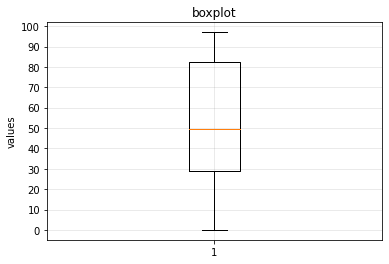

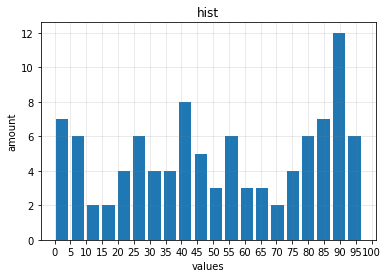

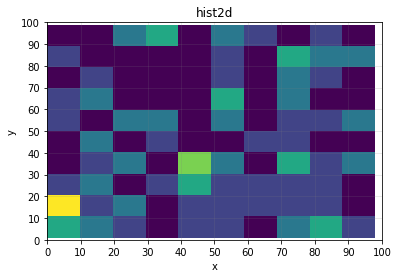

In [208]:
left_border = 0
right_border = 100
little_step = 5
big_step = 10


def show_boxplot(arr):
    fg, ax = plt.subplots()
    ax.boxplot(arr)
    ax.set_xlabel('')
    ax.set_title('boxplot')
    ax.set_ylabel('values')
    ax.grid(color='grey', alpha=0.2, linestyle='-')
    plt.yticks(np.arange(left_border, right_border + 1, big_step))
    plt.show()


def show_hist(arr):
    fg, ax = plt.subplots()
    ax.hist(arr, bins=20, rwidth=0.8)
    ax.set_xlabel('values')
    ax.set_title('hist')
    ax.set_ylabel('amount')
    plt.xticks(np.arange(left_border, right_border + 1, little_step))
    ax.grid(color='grey', alpha=0.2, linestyle='-')
    plt.show()


def show_hist2d(arr):
    xarr = arr[0]
    yarr = arr[1]
    fg, ax = plt.subplots()
    ax.hist2d(xarr, yarr)
    ax.set_xlabel('x')
    ax.set_title('hist2d')
    ax.set_ylabel('y')
    plt.xticks(np.arange(left_border, right_border + 1, big_step))
    plt.yticks(np.arange(left_border, right_border + 1, big_step))
    ax.grid(color='grey', alpha=0.2, linestyle='-')
    plt.show()


random1d = np.random.randint(0, 100, 100)
random2d = np.random.randint(0, 100, (100, 100))

show_boxplot(random1d)
show_hist(random1d)
show_hist2d(random2d)

>Создайте новую колонку, отображающую характеристику набора данных.Новая колонка должна обладать смысловой нагрузкой.

Две новые колонки - суммарной стоимости акций в обороте на начало и конец торгового дня.
Смысл - по ней можно оценить оборот денежных средств, прошедших через биржи

In [209]:
googleSet['Low Volume'] = pd.Series(np.multiply(googleSet.Volume, googleSet.Low))
googleSet['High Volume'] = pd.Series(np.multiply(googleSet.Volume, googleSet.High))

>Сохраните датасет

In [210]:
googleSet.to_csv('resultGoogleHistory.csv', index=False)

savedGoogleSet = pd.read_csv('data/resultGoogleHistory.csv')
savedGoogleSet.head(3)


,Date,Open,High,Low,Close,Adj Close,Volume,Low Volume,High Volume
0,2016-03-28,736.789978,738.989990,732.50000,733.530029,733.530029,1301300,9.532022e+08,9.616477e+08
1,2016-03-29,734.590027,747.250000,728.76001,744.770020,744.770020,1903800,1.387413e+09,1.422615e+09
2,2016-03-30,750.099976,757.880005,748.73999,750.530029,750.530029,1782400,1.334554e+09,1.350845e+09


## Интерполяция кривой

> Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

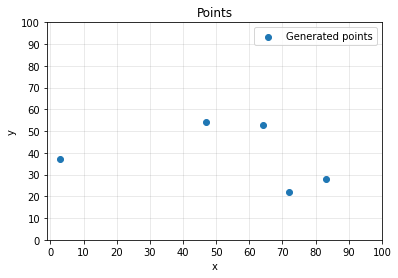

In [225]:
def show_points(points):
    fg, ax = plt.subplots()
    ax.scatter(points[0], points[1], label='Generated points')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Points')
    plt.xticks(np.arange(left_border, right_border + 1, big_step))
    plt.yticks(np.arange(left_border, right_border + 1, big_step))
    ax.grid(color='grey', alpha=0.2, linestyle='-')
    ax.legend()
    plt.show()


points_size = 5
randomPoints = np.random.randint(left_border, right_border, (points_size, points_size))
show_points(randomPoints)

>С помощью библиотеки scipy примените один из её алгоритмов интерполяции к сгенерированным данным

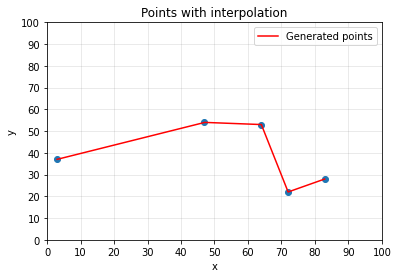

In [226]:
import scipy.interpolate as scp


def show_points_with_interpolation(points, interpolation):
    fg, ax = plt.subplots()
    ax.scatter(points[0], points[1])
    newx = np.arange(min(points[0]), max(points[0]), 0.1)
    newy = interpolation(newx)
    ax.plot(newx, newy, c='red', label='Generated points')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Points with interpolation')
    ax.set_xticks(np.arange(left_border, right_border + 1, big_step))
    ax.set_yticks(np.arange(left_border, right_border + 1, big_step))
    ax.set_xlim([left_border, right_border])
    ax.set_ylim([left_border, right_border])
    ax.grid(color='grey', alpha=0.2, linestyle='-', label='Linear interpolation')
    ax.legend()
    plt.show()


linear_interpolation_f = scp.interp1d(randomPoints[0], randomPoints[1])
show_points_with_interpolation(randomPoints, linear_interpolation_f)

> Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений

Выбираю интерполяционный многочлен Лагранжа и буду верить, что нету точек с одинаковой Х-координатой

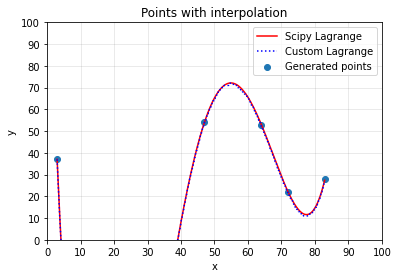

In [228]:
def custom_lagrange(points, x_range):
    x_coords = points[0]
    y_coords = points[1]
    assert len(x_coords) == len(y_coords)
    assert len(np.unique(x_coords)) == len(x_coords)
    result = np.arange(len(x_range))
    for k, x_now in enumerate(x_range):
        y = 0
        for i, x_i in enumerate(x_coords):
            p = 1
            for x_j in x_coords:
                if x_i != x_j:
                    p = p * (x_now - x_j) / (x_i - x_j)
            y = y + p * y_coords[i]
        result[k] = y
    return result


def show_points_and_compare_lagranges(points, interpolation):
    fg, ax = plt.subplots()
    ax.scatter(points[0], points[1], label='Generated points')
    newx = np.arange(min(points[0]), max(points[0]), 0.1)
    newy = interpolation(newx)
    ax.plot(newx, newy, c='red', label='Scipy Lagrange')
    custom_y = custom_lagrange(points, newx)
    ax.plot(newx, custom_y, c='blue', linestyle=':', label='Custom Lagrange')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Points with interpolation')
    ax.set_xticks(np.arange(left_border, right_border + 1, big_step))
    ax.set_yticks(np.arange(left_border, right_border + 1, big_step))
    ax.set_xlim([left_border, right_border])
    ax.set_ylim([left_border, right_border])
    ax.grid(color='grey', alpha=0.2, linestyle='-')
    ax.legend()
    plt.show()


lagrange_interpolation_f = scp.lagrange(randomPoints[0], randomPoints[1])
show_points_and_compare_lagranges(randomPoints, lagrange_interpolation_f)

> Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью matplotlib.
> Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

Никакой. Потому что невозможно написать многочлен Лагранжа по-другому. Ну может точность хромает где-нибудь.

> Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

> Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
Изучите функцию plt.bar. Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения


In [311]:
random_numbers_size = 50
random_numbers = np.random.randint(left_border, right_border, random_numbers_size)
bins_size = 10

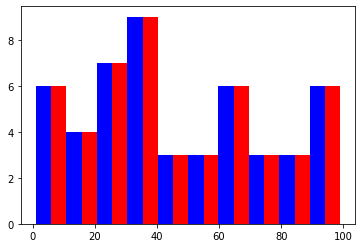

155 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.28 ms ± 74.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


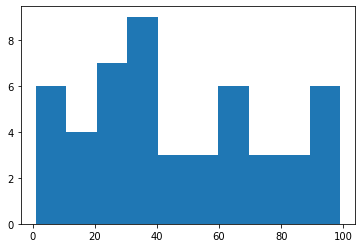

In [357]:
def custom_hist(numbers, bins):
    max_number = max(numbers)
    min_number = min(numbers)
    delta = max_number - min_number
    bin_delta = delta / bins
    result_bins = np.zeros(bins)
    result_bins_values = np.zeros(bins)
    for x in numbers:
        x_delta = x - min_number
        x_bin = min(int(x_delta / bin_delta), bins - 1)
        result_bins[x_bin] = result_bins[x_bin] + 1
    for i in range(bins):
        bin_value = min_number + bin_delta * i
        result_bins_values[i] = bin_value
    return result_bins, result_bins_values


def draw_hist(numbers, bins):
    custom_bins, custom_bins_values = custom_hist(numbers, bins)
    plt.bar(custom_bins_values, custom_bins, align='edge', color='blue',width=5)

plt.hist(random_numbers, bins=bins_size, color='red')
draw_hist(random_numbers, bins=bins_size)
plt.show()

%timeit custom_hist(random_numbers, bins_size)
%timeit plt.hist(random_numbers, bins_size)